In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [67]:
models_ran = [
    'LC_discrete_attention', 
    'change_d_obs_fk', 
    'change_d_obs_cause_effect',
    'change_d_obs_cause',
    'LC_discrete',
]

model_names = [
    'LC w. attention',
    'Change w. full knowledge',
    'Change linear cause effect',
    'Change linear cause',
    'LC basic'
]

In [105]:
# Import datasets

df = pd.DataFrame()
for model in models_ran:
    if df.empty:
        df = pd.read_csv(f'./data/params_fitting_outputs/{model}/summary_fit.csv')
    else:
        df_2 = pd.read_csv(f'./data/params_fitting_outputs/{model}/summary_fit.csv')
        df = pd.concat([df, df_2], axis=0, ignore_index=True)

experiments_series = df_2.experiment.to_list()
df = df.drop(['Unnamed: 0'], axis=1)

df = df.replace(models_ran, model_names)

In [106]:
print(f'Number of lost trials: {df.bic.isna().sum()} out of {df.shape[0]}')


Number of lost trials: 4 out of 1510


In [107]:
print('Sample wide model fit:')
df.groupby('model_name').bic.mean().sort_values()

Sample wide model fit:


model_name
LC w. attention               58.245788
Change w. full knowledge      59.836253
Change linear cause effect    62.766581
LC basic                      64.565290
Change linear cause           67.988315
Name: bic, dtype: float64

In [108]:
experiments = df.experiment.unique()

for i, experiment in enumerate(experiments):
    df_exp = df[df.experiment == experiment]

    print(f'Experiment {i+1} model fits:')
    print(df_exp.groupby('model_name').bic.mean().sort_values())
    print()


Experiment 1 model fits:
model_name
LC w. attention               53.640474
Change w. full knowledge      54.876913
Change linear cause effect    58.988479
LC basic                      59.596956
Change linear cause           62.839898
Name: bic, dtype: float64

Experiment 2 model fits:
model_name
LC w. attention               63.178738
Change w. full knowledge      64.355595
Change linear cause effect    65.877945
LC basic                      69.380321
Change linear cause           71.611617
Name: bic, dtype: float64

Experiment 3 model fits:
model_name
LC w. attention               55.596464
Change w. full knowledge      57.813437
Change linear cause effect    61.554369
LC basic                      62.293483
Change linear cause           66.917948
Name: bic, dtype: float64



In [109]:
pids = df.pid.unique()

df['best_fit'] = np.nan
for pid in pids:
    df_pid = df[df.pid == pid].sort_values('bic')
    df.loc[df.pid == pid, 'best_fit'] = df_pid.model_name.to_list()[0]


In [110]:
df.groupby('pid').experiment.count()

pid
566feba6b937e400052d33b2    5
56cb8858edf8da000b6df354    5
56da8da8c5b248000ae2adaf    5
571de12713b1b70012be47f6    5
572f526c3c27e7000e0b8aaa    5
                           ..
615ec387ec57223c894f6fc2    5
616c3f3a378cb38f3f7ecac3    5
61717173748006894b2b54ff    5
6176966806de000024ed0ddf    5
test_625034503              5
Name: experiment, Length: 302, dtype: int64

In [111]:
df_bic = pd.DataFrame(index=df.pid.unique(), columns=model_names)

for model in model_names:
    df_bic[model] = df[df.model_name == model].bic.to_list()

df_bic = df_bic[df_bic.mean().sort_values().index]
df_bic['Baseline'] = -2 * 4 * np.log(1/5**6)
df_bic['experiment'] = experiments_series

df_bic

,LC w. attention,Change w. full knowledge,Change linear cause effect,LC basic,Change linear cause,Baseline,experiment
56da8da8c5b248000ae2adaf,63.091344,67.761766,75.576402,67.940813,47.786918,77.25302,experiment_1
57e91ff08dcd2c00014bea18,35.489882,41.384843,54.863177,49.769078,41.992764,77.25302,experiment_1
5999ad2a0ed7ae0001991b57,51.025685,59.132440,72.857906,49.757691,73.227161,77.25302,experiment_1
5aead02c78b0060001e6b394,64.199367,70.558897,73.089547,74.730147,50.772848,77.25302,experiment_1
5b8bbd437073290001839123,63.913890,57.573685,68.635904,58.094628,52.113431,77.25302,experiment_1
...,...,...,...,...,...,...,...
615373f88839471e0ab77399,51.155298,36.940557,51.961849,58.094890,64.482857,77.25302,experiment_3
615ec387ec57223c894f6fc2,46.400208,42.158187,23.508854,61.713458,78.429057,77.25302,experiment_3
616c3f3a378cb38f3f7ecac3,51.139535,46.794686,47.311842,49.769003,42.487253,77.25302,experiment_3
61717173748006894b2b54ff,63.347225,64.795371,62.931103,67.928424,74.737068,77.25302,experiment_3


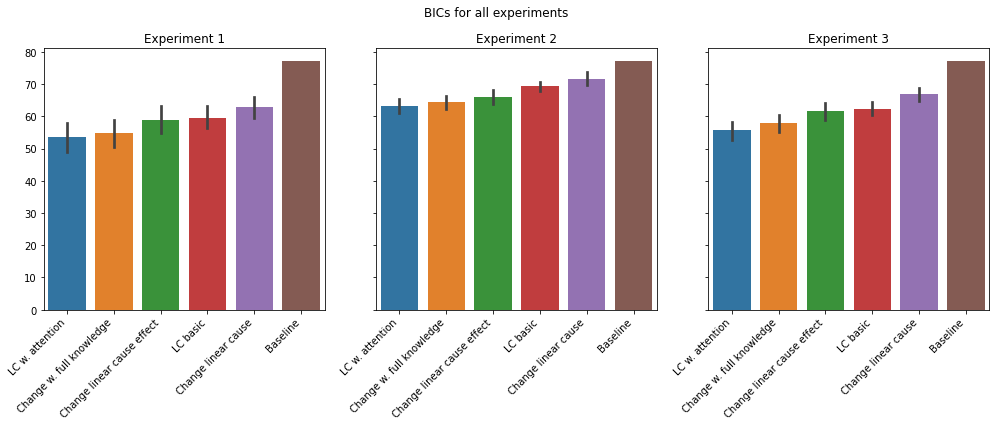

In [122]:

fig, axs = plt.subplots(1, len(experiments), figsize=(14, 6), sharey=True)

for i, experiment in enumerate(experiments):
    df_exp = df_bic[df_bic.experiment == experiment]
    df_exp_plot = df_exp[[col for col in df_exp.columns if col != 'experiment']]

    sns.barplot(data=df_exp_plot, ax=axs[i])
    axs[i].set_xticklabels(df_exp_plot.columns, rotation=45, ha='right')
    axs[i].set_title(f'Experiment {experiment[-1]}')

fig.suptitle('BICs for all experiments')
plt.tight_layout()
plt.show()

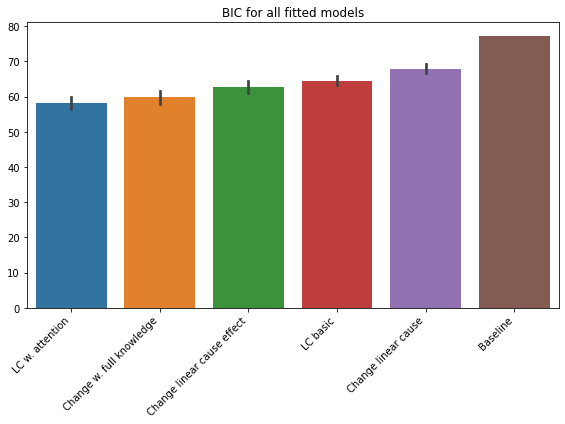

In [120]:
df_bic_plot = df_bic[[col for col in df_bic.columns if col != 'experiment']]
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.barplot(data=df_bic_plot, ax=ax)
ax.set_xticklabels(df_bic_plot.columns, rotation=45, ha='right')

ax.set_title('BIC for all fitted models')
plt.tight_layout()
plt.show()

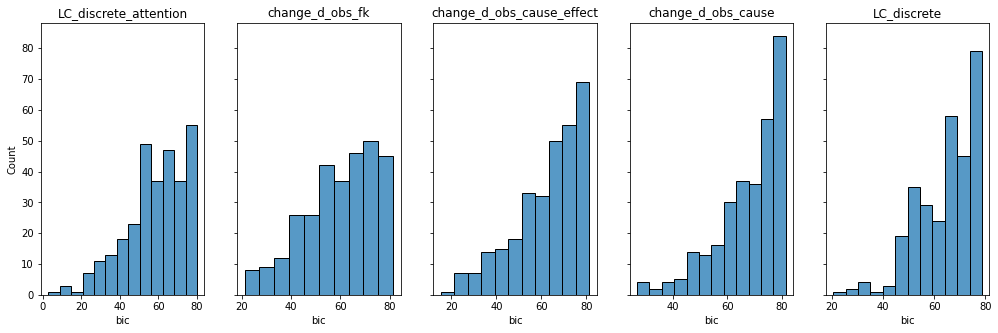

In [44]:
fig, axs = plt.subplots(1, len(models_ran), figsize=(17, 5), sharey=True)

for i, model in enumerate(models_ran):
    sns.histplot(df[df.model_name == model].bic, ax=axs[i])
    axs[i].set_title(model)

plt.show()